# Logistic Regression Classifier Example
Here demonstrates the implementation of the LogisticRegression model for a binary classification task.\
We will train the model using synthetic data, prioritizing the essential preprocessing steps—feature scaling and binary target encoding—required for Gradient Descent to achieve stable and successful convergence.

In [1]:
import numpy as np
from sklearn.datasets import make_classification # Useful for binary data
from rice_ml.supervised_learning.logistic_regression import LogisticRegression
from rice_ml.processing.preprocessing import train_test_split
from rice_ml.processing.post_processing import accuracy_score
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 


## 1. Load Data and Preparation
Generate a simple, separable binary classification dataset.

In [2]:
# Generate synthetic binary classification data
X_raw, y = make_classification(
    n_samples=150, 
    n_features=2,        # Use 2 features for easy visualization
    n_redundant=0, 
    n_informative=2,
    n_classes=2,
    random_state=67
)

# Ensure y is strictly {0, 1} (it usually is with make_classification)
y = y.astype(int) 

print(f"Total Samples: {X_raw.shape[0]}")
print(f"Target Classes: {np.unique(y)}")

Total Samples: 150
Target Classes: [0 1]


## 2. Data Pre-Processing: Scaling and Splitting
Feature scaling is critical for Logistic Regression using Gradient Descent. We standardize the features before splitting.

In [3]:
# Standardization (Z-score scaling)
X_mean = np.mean(X_raw, axis=0)
X_std = np.std(X_raw, axis=0)
X_scaled = (X_raw - X_mean) / X_std

# Split the scaled dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size = 0.2, random_state=67
)

# Verification
print(f"\nTraining Set Size: {X_train.shape[0]} samples")


Training Set Size: 120 samples


## 3. Initialize and Train the Model
Initialize the `LogisticRegression` model with a small learning rate and a high number of epochs to ensure convergence.

In [4]:
# Initialize Logistic Regression model
lr = LogisticRegression(
    eta=0.05, 
    epochs=500, # Increased epochs for better visualization of convergence
    random_state=67
)

print("\nBeginning Logistic Regression Training (Batch Gradient Descent)...")

# Fit the model to the training data
lr.fit(X_train, y_train)

print("Training Complete.")


Beginning Logistic Regression Training (Batch Gradient Descent)...
Training Complete.


## 4. Prediction and Evaluation
Use the trained model to predict class labels and evaluate the classification accuracy.

In [5]:
# 1. Generate predictions on the held-out test set
y_pred = lr.predict(X_test)

# 2. Calculate the Accuracy Score
accuracy = accuracy_score(y_test, y_pred)

print(f"\n--- Evaluation Results ---")
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# 3. Predict Probabilities (Example)
probabilities = lr.predict_proba(X_test[:5])
print(f"\nPredicted Probabilities for first 5 test samples (P(y=1)):")
print(probabilities)


--- Evaluation Results ---
Logistic Regression Accuracy: 0.9667

Predicted Probabilities for first 5 test samples (P(y=1)):
[0.03740042 0.04546891 0.08358144 0.22625937 0.34249817]


6. Analyzing Convergence and Decision Boundary (Optional)
We can plot the cost history to verify that Gradient Descent converged successfully.

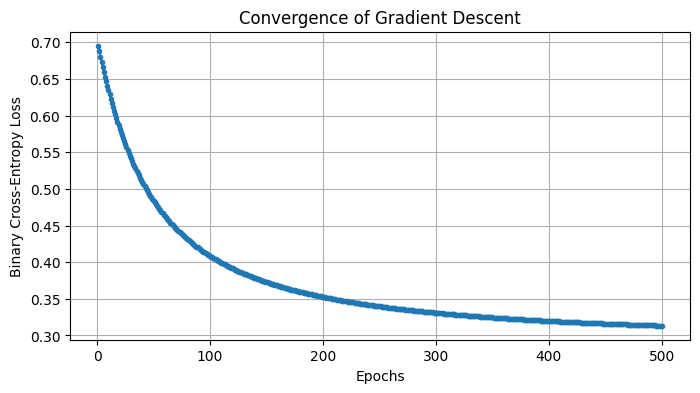

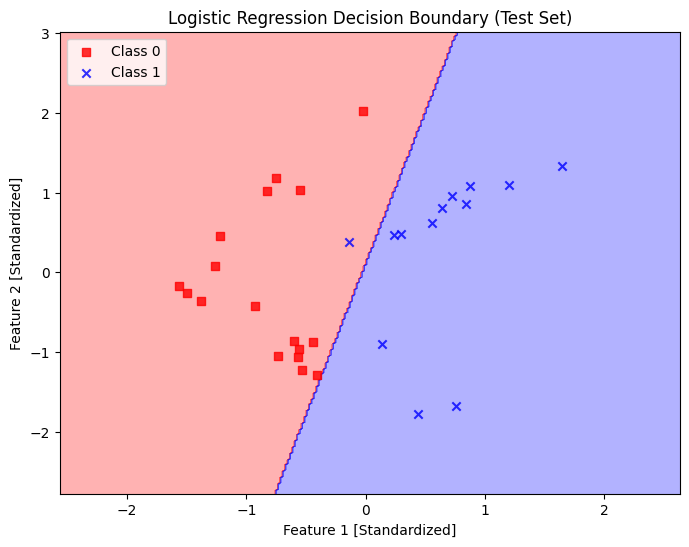

In [6]:
# 6.1 Plot Cost History
plt.figure(figsize=(8, 4))
plt.plot(range(1, lr.epochs + 1), lr.cost_history_, marker='o', markersize=3)
plt.xlabel('Epochs')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Convergence of Gradient Descent')
plt.grid(True)
plt.show()

# 6.2 Plot Decision Boundary (Requires 2 features)
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class {cl}')

plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, classifier=lr)
plt.xlabel('Feature 1 [Standardized]')
plt.ylabel('Feature 2 [Standardized]')
plt.title('Logistic Regression Decision Boundary (Test Set)')
plt.legend(loc='upper left')
plt.show()